In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
sales_data = pd.read_csv("Downloads\sales_data_sample.csv",encoding='latin1')

In [225]:
sales_data_shape = sales_data.shape
print(sales_data_shape)

(2823, 25)


In [226]:
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [227]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [228]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [229]:
# data type of each column
sales_data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

# Preprocessing

In [230]:
sales_data["TERRITORY"] = sales_data["TERRITORY"].replace(np.nan,'NA')

In [231]:
sales_data = sales_data.drop(['ADDRESSLINE2'],1)

### Sales_data shape after dropping a column

In [232]:
sales_data.shape

(2823, 24)

### Converting 'ORDERDATE' column from str to datetime dtype

In [233]:
type(sales_data['ORDERDATE'][0])

str

In [234]:
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])

In [235]:
type(sales_data['ORDERDATE'][0])

pandas._libs.tslib.Timestamp

In [236]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NA,Brown,Julie,Medium


## check empty values in the data set

In [237]:
sales_data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [238]:
# as sales_data['STATE'] has 1486 entries, instead of removing those rows replacing them with 'OTHER'
sales_data['STATE'] = sales_data['STATE'].replace(np.nan,'OTHER')

In [239]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,OTHER,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,OTHER,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NA,Brown,Julie,Medium


### Analysis of data

#### Analysis Functions

In [278]:
# A generic function to get the sales by <particular item>
def getSales(inlist,colname,**kwargs):
    """
    A generic function to get the sales by <particular item>
    
    returns a dictionary with inlist as keys and the sales as values
    
    Parameters
    ----------
    inlist : list
            list of items where sales is calculated which are generated by these items
    colname : str
            column name where the inlist items are present
    kwargs :
        year : int
            year number for which sales is calculated
    """
    res = {}
    if (len(kwargs) == 0):
        for item in inlist:
            res[item] = sales_data[sales_data[colname] == item]['SALES'].sum()
    else:
        for item in inlist:
            res[item] = sales_data[(sales_data[colname] == item) & (sales_data['YEAR_ID'] == kwargs['year'])]['SALES'].sum()
    return res

In [287]:
# A function to get the unique elements in a column
def get_unique_items_of_column(colname):
    """
    returns unique list of items of a column
    
    Parameters
    ----------
    colname : str
            column name of a dataset
    """
    return list(set(sales_data[colname]))

In [297]:
# function to get the count of unique elements in a column
def get_count_of_unique_items_of_column(colname):
    """
    returns a dictionary with unique elements and their count in a column
    
    Parameters
    ----------
    colname : str
            column name of a dataset
    """
    return dict(sales_data.groupby(colname).size())

In [306]:
# function to get the order details of given order id
def get_order_details(order_id):
    """
    returns a dataframe of order Details of given order id
    
    Parameters
    -----------
    order_id : int
            order id number
    """
    order_details = sales_data[sales_data['ORDERNUMBER']==order_id]
    return order_details

In [307]:
# function to get the list of order numbers with the given order status
def get_order_numbers_byStatus(status):
    """
    returns list of order numbers with the given order status
    
    Parameters
    -----------
    status : string
            the order status(cancelled/in process/on hold/etc...)
    """
    order_numbers = list(set(sales_data[sales_data['STATUS']==status]['ORDERNUMBER']))
    return order_numbers
    

#### Plotting(Graphs) functions

In [289]:
# function to plot a bar chart for the given dictionary with its keys as x-axis and values as y-axis
def barPlot(data_dict):
    """
    returns bar chart for the given dictionary(data_dict) with its data_dict.keys() as x-axis data and data_dict.values() as y-axis
    data
    
    Parameters
    ----------
    data_dict : dict
            keys as x-axis data and values as y-axis data
    """
    plt.bar(data_dict.keys(),data_dict.values())
    plt.xticks(rotation=90)
    return plt.show()

### Sample Types of questions on the data set
#### 1. What are the sales by product?

In [290]:
products = get_unique_items_of_column('PRODUCTLINE')

In [291]:
print("Unique products:\n",products)

Unique products:
 ['Vintage Cars', 'Classic Cars', 'Trucks and Buses', 'Planes', 'Trains', 'Motorcycles', 'Ships']


In [292]:
product_wise_sales = getSales(products,'PRODUCTLINE')

In [293]:
print("product wise total sales:\n",product_wise_sales)

product wise total sales:
 {'Vintage Cars': 1903150.8399999992, 'Classic Cars': 3919615.659999997, 'Trucks and Buses': 1127789.8399999996, 'Planes': 975003.5700000001, 'Trains': 226243.46999999997, 'Motorcycles': 1166388.3400000003, 'Ships': 714437.13}


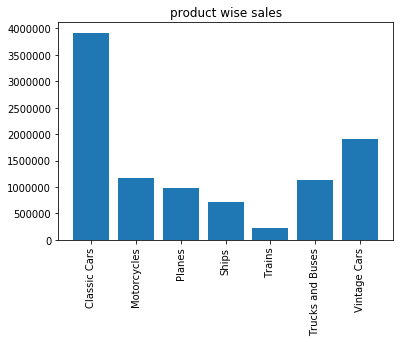

In [294]:
# bar chart of the product wise sales
plt.title("product wise sales")
barPlot(product_wise_sales)

#### 2. Number of orders in each order status?

In [298]:
no_of_orders_by_status = get_count_of_unique_items_of_column('STATUS')

In [299]:
print(no_of_orders_by_status)

{'Cancelled': 60, 'Disputed': 14, 'In Process': 41, 'On Hold': 44, 'Resolved': 47, 'Shipped': 2617}


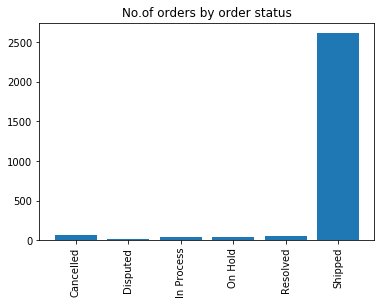

In [301]:
plt.title("No.of orders by order status")
barPlot(no_of_orders_by_status)

#### 3. Show order details that are in cancelled state?

In [308]:
cancelled_orders = get_order_numbers_byStatus('Cancelled')
print(cancelled_orders)

[10248, 10253, 10262, 10167]


In [320]:
# print cancelled order details
for order_number in cancelled_orders:
    order_details = get_order_details(order_number).drop(['ORDERNUMBER','STATUS'],1)
    print("order Number: {} \n order Details:\n {}".format(order_number,order_details))

order Number: 10248 
 order Details:
       QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
117                20     100.00                3  2910.40 2004-05-07       2   
946                21      73.98                1  1553.58 2004-05-07       2   
1000               32     100.00               12  3802.56 2004-05-07       2   
1077               42     100.00               14  5082.42 2004-05-07       2   
1301               42      75.48               11  3170.16 2004-05-07       2   
1602               48     100.00               10  6960.48 2004-05-07       2   
1831               30     100.00                5  3053.70 2004-05-07       2   
1955               23      76.31                2  1755.13 2004-05-07       2   
2469               36      71.34                6  2568.24 2004-05-07       2   
2521               40     100.00               13  4157.20 2004-05-07       2   
2600               32      75.89                4  2428.48 2004-05-07  

#### 4. What are the products sold here?

In [321]:
print(get_unique_items_of_column('PRODUCTLINE'))

['Vintage Cars', 'Classic Cars', 'Trucks and Buses', 'Planes', 'Trains', 'Motorcycles', 'Ships']


#### 5. What is the revenue generated by each customer?

In [322]:
customers = get_unique_items_of_column('CUSTOMERNAME')

In [324]:
print("Customer list:\n",customers)

Customer list:
 ['Enaco Distributors', 'Lyon Souveniers', 'Vida Sport, Ltd', 'Signal Collectibles Ltd.', 'Toys of Finland, Co.', 'Reims Collectables', 'Land of Toys Inc.', 'Toms Spezialitten, Ltd', 'Osaka Souveniers Co.', 'Diecast Collectables', 'Australian Gift Network, Co', 'Online Diecast Creations Co.', 'Iberia Gift Imports, Corp.', 'Boards & Toys Co.', 'The Sharp Gifts Warehouse', 'Suominen Souveniers', "Marta's Replicas Co.", 'Gifts4AllAges.com', 'Saveley & Henriot, Co.', 'Corporate Gift Ideas Co.', 'Royal Canadian Collectables, Ltd.', 'Rovelli Gifts', 'Classic Gift Ideas, Inc', 'Daedalus Designs Imports', 'Handji Gifts& Co', 'Toys4GrownUps.com', 'Atelier graphique', 'Bavarian Collectables Imports, Co.', 'Motor Mint Distributors Inc.', 'Cambridge Collectables Co.', 'Stylish Desk Decors, Co.', 'Mini Caravy', 'Australian Collectables, Ltd', "La Corne D'abondance, Co.", "Anna's Decorations, Ltd", 'Danish Wholesale Imports', 'Mini Gifts Distributors Ltd.', 'Australian Collectors, Co.

In [325]:
customer_wise_sales = getSales(customers,'CUSTOMERNAME')

In [326]:
print(customer_wise_sales)

{'Enaco Distributors': 78411.86000000002, 'Lyon Souveniers': 78570.34000000001, 'Vida Sport, Ltd': 117713.55999999998, 'Signal Collectibles Ltd.': 50218.51000000001, 'Toys of Finland, Co.': 111250.37999999996, 'Reims Collectables': 135042.94, 'Land of Toys Inc.': 164069.44000000003, 'Toms Spezialitten, Ltd': 100306.58, 'Osaka Souveniers Co.': 67605.07, 'Diecast Collectables': 70859.78, 'Australian Gift Network, Co': 59469.11999999999, 'Online Diecast Creations Co.': 131685.30000000002, 'Iberia Gift Imports, Corp.': 54723.62, 'Boards & Toys Co.': 9129.349999999999, 'The Sharp Gifts Warehouse': 160010.26999999996, 'Suominen Souveniers': 113961.14999999997, "Marta's Replicas Co.": 103080.37999999999, 'Gifts4AllAges.com': 83209.88, 'Saveley & Henriot, Co.': 142874.25000000003, 'Corporate Gift Ideas Co.': 149882.49999999997, 'Royal Canadian Collectables, Ltd.': 74634.84999999999, 'Rovelli Gifts': 137955.72000000003, 'Classic Gift Ideas, Inc': 67506.96999999999, 'Daedalus Designs Imports': 6

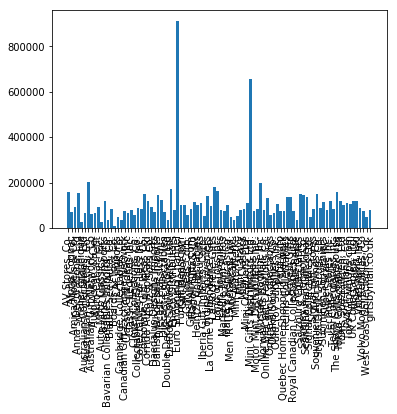

In [329]:
barPlot(customer_wise_sales)

#### 6. Year wise sales?

In [331]:
#sales_data.groupby('YEAR_ID').sum()['SALES']

In [332]:
years_in_data_set = get_unique_items_of_column('YEAR_ID')

In [333]:
print(years_in_data_set)

[2003, 2004, 2005]


In [334]:
year_wise_sales  = getSales(years_in_data_set,'YEAR_ID')

In [335]:
print(year_wise_sales)

{2003: 3516979.540000001, 2004: 4724162.599999997, 2005: 1791486.71}


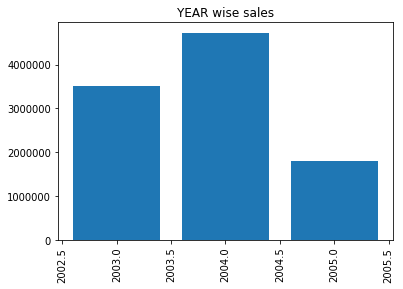

In [336]:
plt.title('YEAR wise sales')
barPlot(year_wise_sales)

#### 7. Show year wise number of orders?

In [359]:
#sales_data.groupby('YEAR_ID').count()['ORDERNUMBER']

In [360]:
year_wise_total_orders = get_count_of_unique_items_of_column('YEAR_ID')

In [361]:
print(year_wise_total_orders)

{2003: 1000, 2004: 1345, 2005: 478}


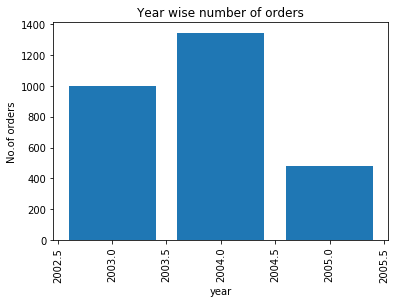

In [363]:
plt.title("Year wise number of orders")
plt.xlabel("year")
plt.ylabel("No.of orders")
barPlot(year_wise_total_orders)

#### 8. Country wise sales?

In [364]:
countries = get_unique_items_of_column('COUNTRY')

In [365]:
print(countries)

['Belgium', 'USA', 'Finland', 'Philippines', 'Germany', 'Switzerland', 'Australia', 'Japan', 'Denmark', 'Ireland', 'Spain', 'Singapore', 'Austria', 'UK', 'Sweden', 'Italy', 'France', 'Canada', 'Norway']


In [366]:
country_wise_sales = getSales(uni_country,'COUNTRY')

In [367]:
country_wise_sales

{'Australia': 630623.1000000001,
 'Austria': 202062.53,
 'Belgium': 108412.62,
 'Canada': 224078.55999999994,
 'Denmark': 245637.15,
 'Finland': 329581.9100000001,
 'France': 1110916.5199999993,
 'Germany': 220472.08999999994,
 'Ireland': 57756.43,
 'Italy': 374674.30999999976,
 'Japan': 188167.80999999997,
 'Norway': 307463.7000000001,
 'Philippines': 94015.73,
 'Singapore': 288488.41000000003,
 'Spain': 1215686.9200000009,
 'Sweden': 210014.21,
 'Switzerland': 117713.55999999998,
 'UK': 478880.4600000001,
 'USA': 3627982.83}

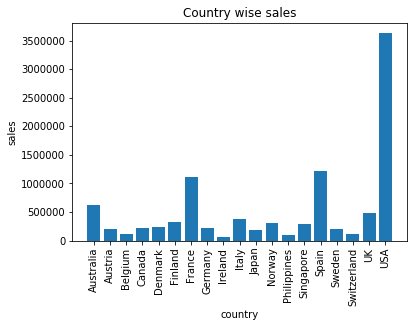

In [368]:
plt.title("Country wise sales")
plt.xlabel("country")
plt.ylabel("sales")
barPlot(country_sales)

#### 9. What are the country wise sales in 2005? 

In [369]:
country_wise_sales_in_year = getSales(countries,'COUNTRY',year=2005)

In [370]:
country_wise_sales_in_year

{'Australia': 145091.97,
 'Austria': 68250.26000000001,
 'Belgium': 25040.11,
 'Canada': 33692.97,
 'Denmark': 26012.870000000003,
 'Finland': 126851.70999999998,
 'France': 242956.4,
 'Germany': 0,
 'Ireland': 0,
 'Italy': 41509.94,
 'Japan': 38745.34,
 'Norway': 0,
 'Philippines': 0,
 'Singapore': 6763.18,
 'Spain': 326798.17000000004,
 'Sweden': 31606.72,
 'Switzerland': 0,
 'UK': 40802.810000000005,
 'USA': 637364.2600000001}

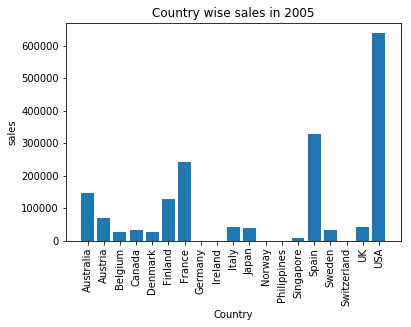

In [372]:
plt.title("Country wise sales in 2005")
plt.xlabel("Country")
plt.ylabel("sales")
barPlot(country_wise_sales_in_year)

#### 10. Deal wise sales?

In [374]:
deal_sizes = get_unique_items_of_column('DEALSIZE')

In [375]:
print(deal_sizes)

['Small', 'Large', 'Medium']


In [376]:
deal_size_wise_sales = getSales(deal_sizes,'DEALSIZE')

In [377]:
print(deal_size_wise_sales)

{'Small': 2643077.349999997, 'Large': 1302119.2600000007, 'Medium': 6087432.240000006}


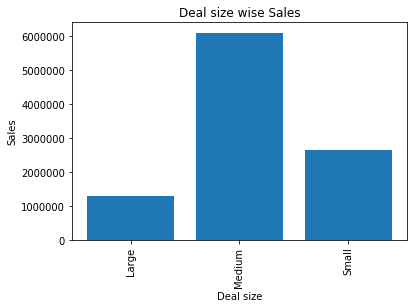

In [378]:
plt.title("Deal size wise Sales")
plt.xlabel("Deal size")
plt.ylabel("Sales")
barPlot(deal_size_wise_sales)

#### 11. Deal size wise sales in  2005?

In [384]:
deal_size_wise_sales_in_year = getSales(deal_sizes,'DEALSIZE', year=2005)

In [385]:
deal_size_wise_sales_in_year

{'Large': 351545.6099999999, 'Medium': 1039362.6199999999, 'Small': 400578.48}

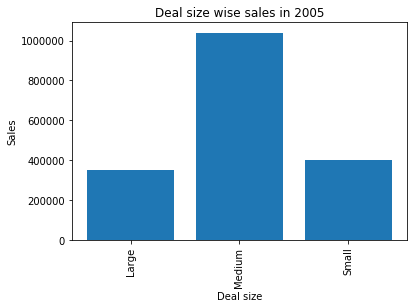

In [386]:
plt.title("Deal size wise sales in 2005")
plt.xlabel("Deal size")
plt.ylabel("Sales")
barPlot(deal_size_wise_sales_in_year)

#### 12. Number of orders by deal size?

In [390]:
deal_size_wise_total_number_of_orders = get_count_of_unique_items_of_column('DEALSIZE')

In [391]:
print(deal_size_wise_total_number_of_orders)

{'Large': 157, 'Medium': 1384, 'Small': 1282}


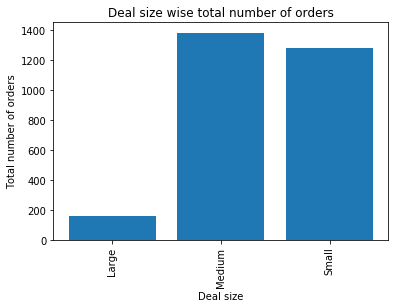

In [392]:
plt.title("Deal size wise total number of orders")
plt.xlabel("Deal size")
plt.ylabel("Total number of orders")
barPlot(deal_size_wise_total_number_of_orders)